In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [183]:
team = pd.read_csv('Dropbox/ThinkFul Bootcamp/Data Sets/Fantasy Football/Unit 4 - Capstone Project Review/TEAM.csv')
game = pd.read_csv('Dropbox/ThinkFul Bootcamp/Data Sets/Fantasy Football/Unit 4 - Capstone Project Review/GAME.csv')
offense = pd.read_csv('Dropbox/ThinkFul Bootcamp/Data Sets/Fantasy Football/Unit 4 - Capstone Project Review/OFFENSE.csv', low_memory=False)

# Data

I will be working with Armchair Analysis's dataset of NFL stats from 2000-2017.  Armchair Analyis is a company that provides comprenhesive NFL data to individuals, researchers and businesses focused on the sport of American Football.

For the purposes of this project review, we will focus on the use of this data as it relates to Fantasy Football.  Put simply, Fantasy Football is way for fans to get more engaged in games.  For example, a fan may receive six Fantasy Points when a player the fan have chosen scores a touchdown.

The Fantasy Football industry, with has been around for many years, has grown significantly in popularity recently with introduction of Daily Fantasy Sports (DFS). Prior to DFS, fans were required to participate in an entire NFL season; however, now, DFS allows fans to play just for a particular day.  This is significant because a fan can enter into a competition with other fans, and earn money that day by having the most Fantasy Points. 

To start my analysis, I will be working with the Team and Game csv files.  The Team table contains specific data related to each team; however, for this analysis I will focus only on points scored by team.  The Game table contains more generic data such as, game id, season, visiting team name, and home team name.  This table also includes data on weather conditions (e.g., temperature, humidity, wind speed) and other conditions (e.g., stadium name, playing surface).  

Lastly, the Over/Under is included in this table.  The Over/Under a significant metric used in sports betting to indicate the amount of points two teams are predicted to score.  Fans can place bets that the total score will be "over" or "under" this number.  This number is significant to fantasy football players as it helps identify the highest scoring games.

The reason for choosing these two tables is straighforward.  Teams that score the most actual points give fans the best opportunity to gain fantasy points.  Similarily, games that are high scoring are most advantageous to fans.  As such, one common strategy by fantasy players is to "stack" lineups with multiple players from one team and/or one game.   

# Analytical Question
#1 - Which teams score the most points per game?  Are there any outliers in terms of points scored?

Get average points per game for all NFL team from 2000 to 2017.

In [184]:
team_history = team.iloc[0:, [1,2,3]]
team_pts = team_history.groupby('tname')['pts'].aggregate(np.mean)

Generate boxplot to identify any outliers

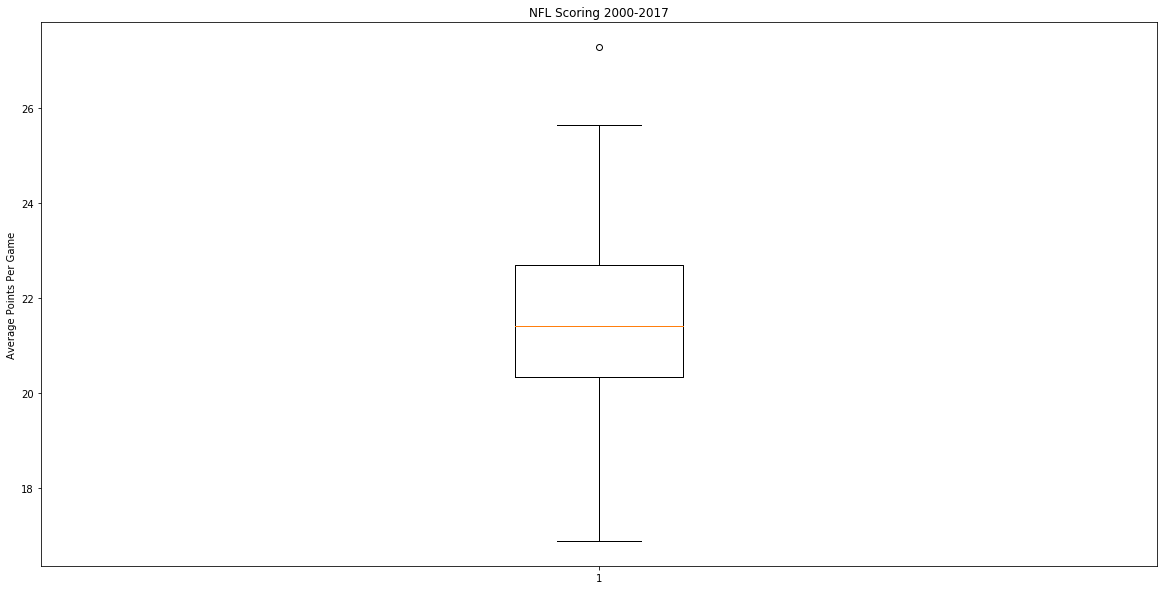

In [185]:
plt.boxplot(team_pts)
plt.ylabel('Average Points Per Game')
plt.title('NFL Scoring 2000-2017')

plt.show()

The boxplot above identifies one data point that seems to be an outlier.  I will investigate further by plotting a bar graph to determine which team this is visually.  

Plot average points per game for all NFL team from 2000 to 2017.

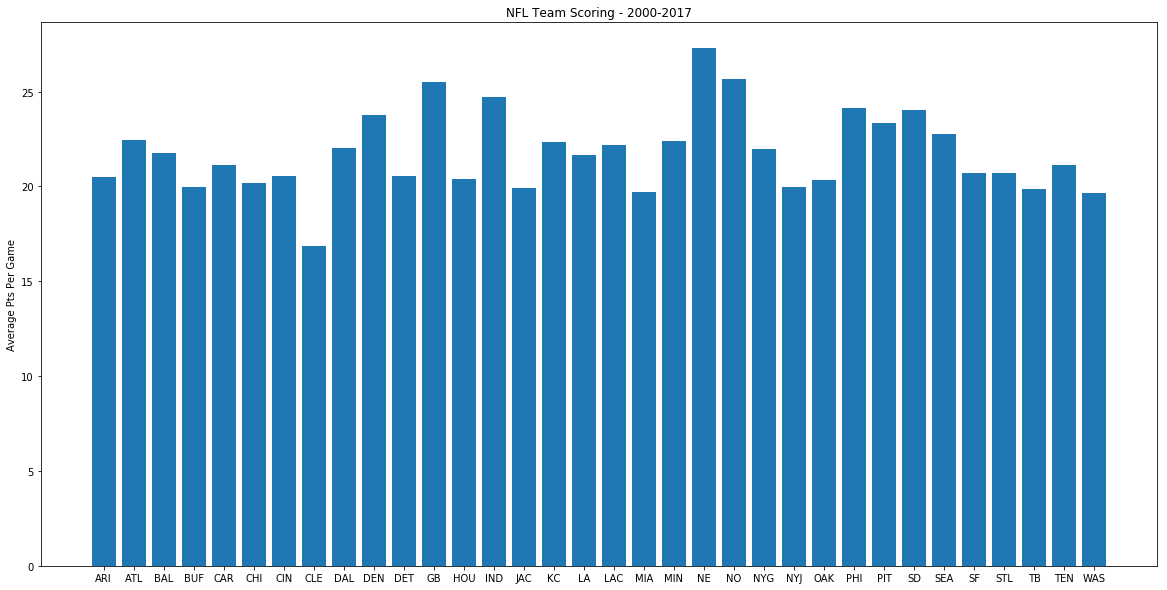

In [186]:
plt.figure(figsize=(20, 10))
plt.bar(team_pts.index, team_pts)

plt.title('NFL Team Scoring - 2000-2017')
plt.ylabel('Average Pts Per Game')

plt.show()

The bar graph shows that the one outlier team is the New England Patriots.  This team has been the most successful team during this timeframe, appearing in seven Super Bowls and winnng 5.  As such, the Patriots may be a special case to investigate further in the future.

The top scoring teams are as follows: Saints (NO), Packers (GB), Colts (IND), Eagles (PHI), Chargers (SD) Broncos (DE), Steelers (PIT), Seahawks (SEA), Falcons (ATL).  Of these teams, only the Chargers have not at least been to the Super Bowl during this time period.  It would be interesting to investigate these teams further to identify factors that contribute the most to their scoring success.

Lastly, the count in our table is 34, although the number of established teams in the NFL during this time period has always been 32.  This is due to the expansion of NFL franchises into new cities, and the subsquently disbanding of the previous location's organization.

Remove New England from list and plot Historgram to examine normality

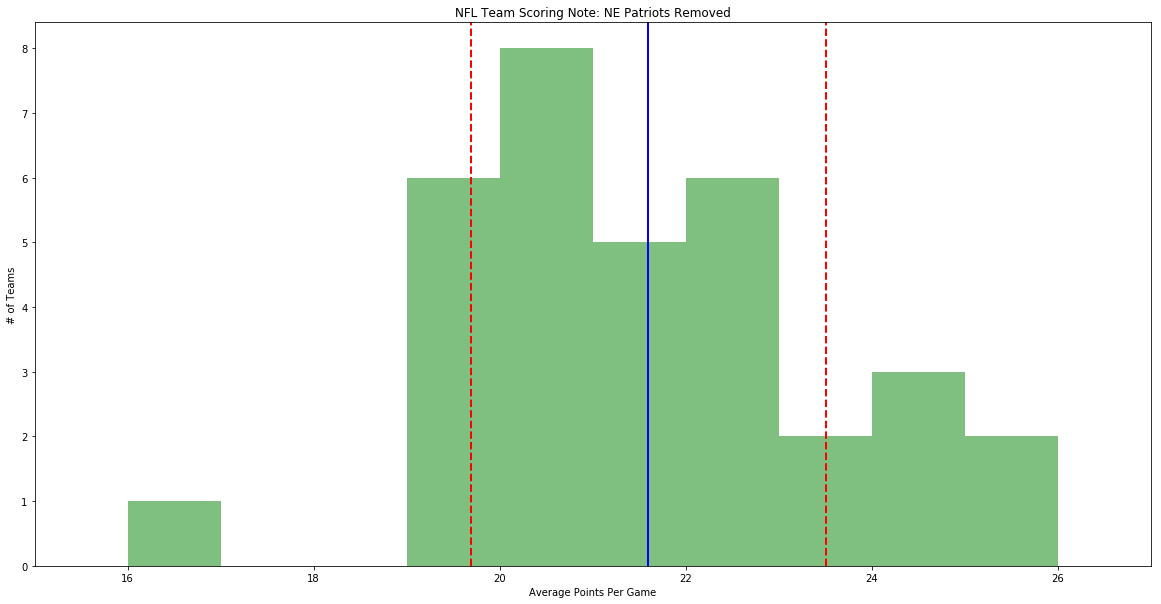

In [187]:
team_pts = team_pts.drop('NE')

plt.hist(team_pts,color='green', bins=np.arange(-10, 40), alpha=.5)

plt.xlabel('Average Points Per Game')
plt.ylabel('# of Teams')
plt.xlim([15, 27])

plt.axvline(team_pts.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(team_pts.mean() + team_pts.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(team_pts.mean() - team_pts.std(), color='r', linestyle='dashed', linewidth=2) 

plt.title('NFL Team Scoring Note: NE Patriots Removed')

plt.show()

The histogram indicates that data points do seem to cluster around the mean. The standard deviation seems to reflect the overall variation in the variable; however, there seems to be another outlier (the Cleveland Browns) that may need to be investigated further.  

#2 - Which teams seem to frequently score more points that expected?

The previous analysis helped us identify the teams that are generally most likely to score a high number of points.  However, it would also be interesting to idenfity "sleepers."  This would included teams that may often score more points than experts predict.  As such, the ability to effectively choose a "sleeper team" would be advantageous.  

Calculate the actual points scored in a game by adding the points scored by the home and visiting teams.  
Add this column to the Game table.

In [188]:
game['pts_actual'] = game['ptsv'] + game['ptsh']

Add columns to the Game table that specify if a game exceeded the Over/Under

In [189]:
game['ou_diff'] = game['pts_actual'] - game['ou']

ou_result = []

for row in game['ou_diff']:
    if row >= 0:
        ou_result.append('Over')
    else:
        ou_result.append('Under')
        
game['ou_result'] = ou_result

Create a data frame for games that exceeded the Over/Under.

In [190]:
over = game[game['ou_result'] == 'Over']

In [207]:
over_visitor = over.iloc[0:, [4,19]]

Plot the number of times each team exceeds the Over/Under

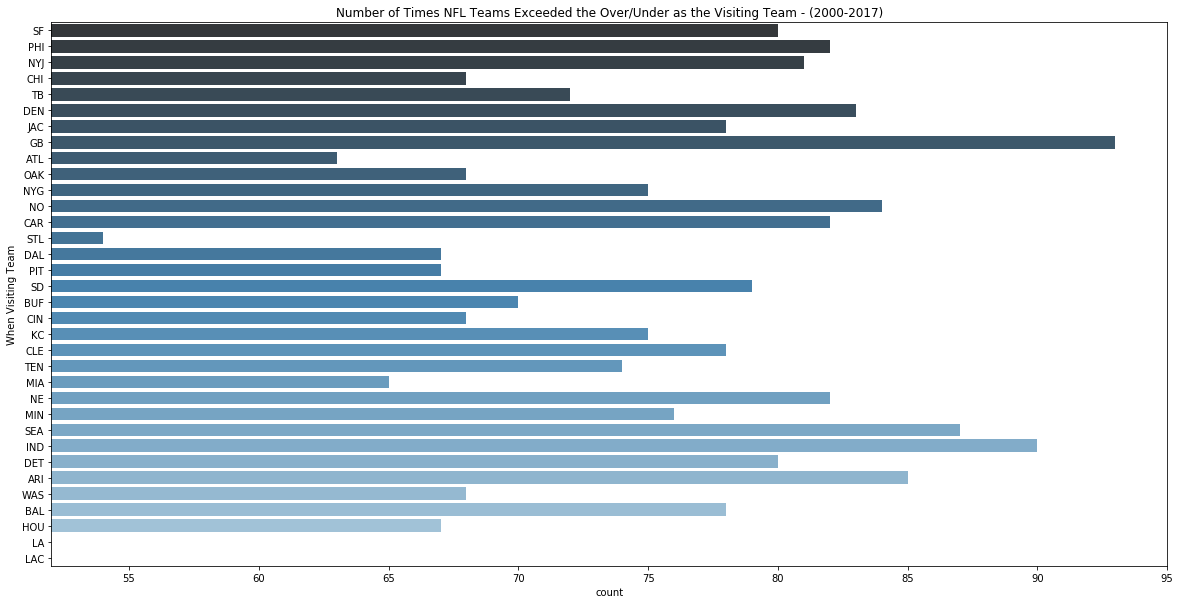

In [385]:
sns.countplot(y="v", data=over_visitor, palette="Blues_d")
plt.xlim(52, 95)
plt.ylabel('When Visiting Team')
plt.title('Number of Times NFL Teams Exceeded the Over/Under as the Visiting Team - (2000-2017)')

plt.show()

As one might expect, the majority of the teams that exceeded the Over/Under most frequently were also the teams that averaged the most number of points per game.  For this conclusion, we make the assumption that the teams in question are contributing the most points to the overall game score.  In fact, it could be the team's opponent who has scored more points in the game.  This is someting to be investigated further in the future.  

Also, I have chosen the visiting team in the graph above, as the visiting team is often the underdog in NFL games.  As such, being able to identify visiting teams that are most likely to exceed the Over/Under aids in effectively choosing a "sleeper team."  In future analysis, the same analysis can be conducting on home teams.

The previous plot is too buy.  Let's plot just the top 10 visiting teams who frequently exceed the Over/Under

In [322]:
top_over_visitor = over_visitor.v.value_counts().to_frame().head(10)

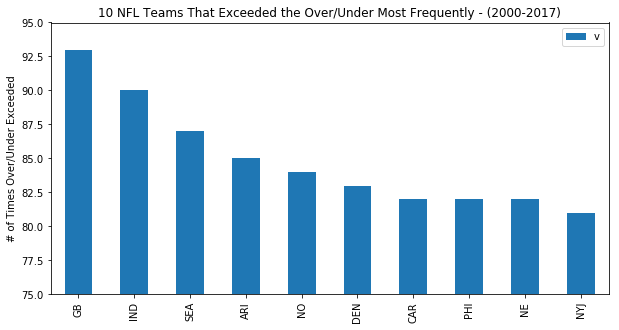

In [340]:
top_over_visitor.plot(kind='bar', figsize=(10,5))

plt.title('10 NFL Teams That Exceeded the Over/Under Most Frequently - (2000-2017)')

plt.ylabel('# of Times Over/Under Exceeded')
plt.ylim(75, 95)

plt.show()

#3 - By what magnitude, does the top team exceed the Over/Under? How is this impacted by weather conditions?

Calculate Magnitute Factor

In [394]:
over_cond = over.iloc[0:, [4,6,7,8,9,10,11,13,17,18,19]]
over_cond['ou_per_diff'] = (over_cond['ou_diff'] / over_cond['ou']) * 100

While it is important to know which teams most frequently exceed the Over/Under, knowing by what magnitude these teams exceed the Over/Under can assist in identifying which teams will be highest scoring in a particular game.  

To determine the magnitude (by how much does a team exceed the Over/Under), I calculated the 'ou_per_diff'.  This was calculated similarly to the way percentage change is determined; essentially taking the difference between actual points and predicted points (Over/Under), and then dividing this value by the Over/Under.  

I believe there are more effective ways to measure this factor; however, I believe this factor can be useful in the initial analysis of this dataset. 

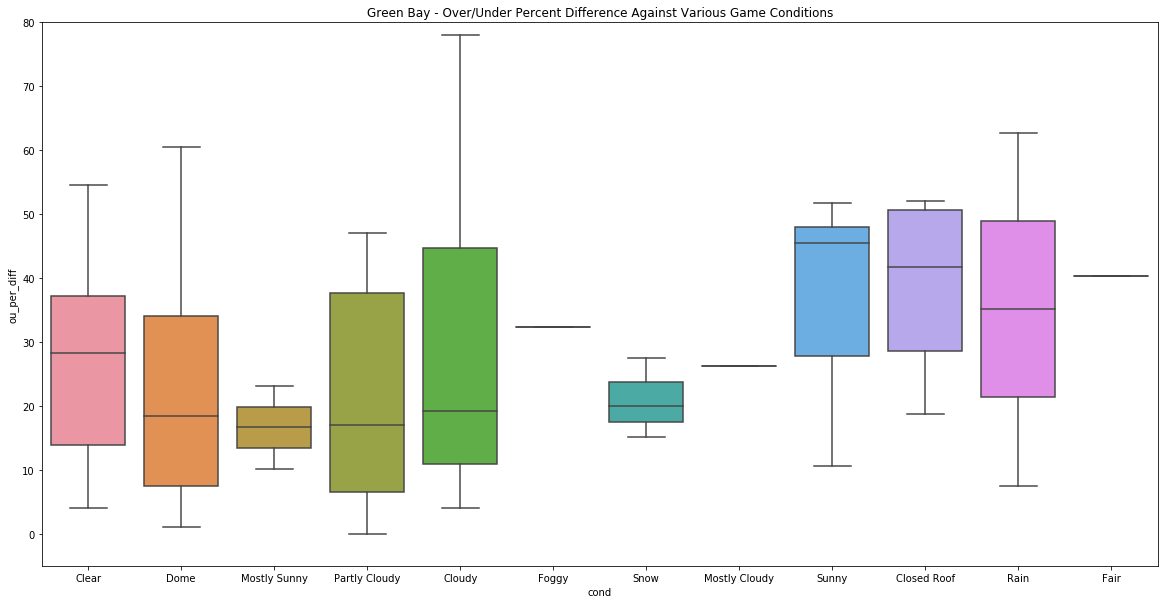

In [393]:
over_cond_GB = over_cond[over_cond['v'] == 'GB']

sns.boxplot(x='cond', y='ou_per_diff', data=over_cond_GB)
plt.ylim(-5, 80)
plt.title('Green Bay - Over/Under Percent Difference Against Various Game Conditions')
plt.show()

The Boxplot appears to indicate that Green Bay is more likely to exceed the Over/Under when weather condinitons. are Sunny and/or Rainy, and when the stadium roof is closed. One of the shortcomings of my analysis is that covers all NFL seasons from 2000 to 2017.  Given the fluidity of the league, with new players, coaches changing frequently, it may make more sense to limit my analyis to most recent 5 seasons (2012-2017).  

# Future Research

My future project proposal will build upon the analytical questions listed in this document and aim to close the aforementioned gaps identified.  My ultimate goal is to conduct analysis at the player level, such that when I effectively predict the highest scoring team scenarios, I will also be able to effectively predict the highest performing players for particular game.  
As such, the future research question to answer would be - which game, team and player factors have the greatest impact on predicting NFL fantasy sport outcomes?

To answer this question, I plan to utilize the following machine learning specializations: Artifical Neural Networks and Clustering.